# MNIST Fashion Item Classification with a Fully-Connected Neural Network
*By Carlos Santiago Bañón*

**Year:** 2020

**Technologies:** Python, NumPy, Matplotlib, TensforFlow, Keras

**Discipline(s):** Computer Vision, Deep Learning

**Keywords:** `classification`, `computer-vision`, `deep-learning`, `fully-connected`, `mnist`, `multi-class-classification`, `neural-network`

This notebook presents an MNIST fashion classifier built with a fully-connnected neural network in TensorFlow and Keras.

## 1. Import Statements

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf

## 2. Data Preprocessing

---



The first step is to preprocess our data. Here, we load the MNIST fashion dataset from the Keras datasets library, split it into training and test sets, and normalize the matrices.

In [2]:
# Load the MNIST dataset.
fashion_mnist = tf.keras.datasets.fashion_mnist
train_data, test_data = fashion_mnist.load_data()

In [3]:
# Divide the data into features and labels.
train_images, y_train = train_data
test_images, y_test = test_data

In [4]:
# Normalize the images.
X_train = train_images.astype('float32') / 255
X_test = test_images.astype('float32') / 255

Further, the following are the shapes of each matrix, as well as a visualization of a random MNIST fashion item.

In [5]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 28, 28)
Testing Images: (10000, 28, 28)
Training Labels: (60000,)
Test Labels: (10000,)


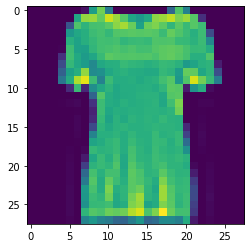

In [6]:
# Show a sample MNIST fashion item.
plt.imshow(train_images[10])
plt.show()

Finally, we define the corresponding item names for each class.

In [7]:
# Define the class names.
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

## 3. Neural Network

---



### 3.1. Define the Model

We then have to define our neural network. Here, we define a sequential model with two fully-connected layers.

In [8]:
# Define the sequential model.
model = tf.keras.models.Sequential()

In [9]:
# Define the network's layes.
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
# Show the model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [11]:
# Compile the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2. Train the Model

We then train the model on 20 epochs, using a batch size of 256.

In [12]:
# Define the parameters.
num_epochs = 20
batch_size = 256

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test, y_test))

Epoch 1/20
235/235 [==============================] - 1s 6ms/step - loss: 0.6072 - accuracy: 0.7948 - val_loss: 0.5025 - val_accuracy: 0.8260
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.4238 - accuracy: 0.8528 - val_loss: 0.4457 - val_accuracy: 0.8421
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3838 - accuracy: 0.8662 - val_loss: 0.4031 - val_accuracy: 0.8596
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3602 - accuracy: 0.8724 - val_loss: 0.3894 - val_accuracy: 0.8611
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3435 - accuracy: 0.8773 - val_loss: 0.3842 - val_accuracy: 0.8641
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.3283 - accuracy: 0.8831 - val_loss: 0.3707 - val_accuracy: 0.8698
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 0.3131 - accuracy: 0.8869 - val_loss: 0.3700 - val_accuracy: 0.8685
Epoch 

### 3.4. Display the Metrics

Finally, we display the metrics. We begin by displaying the model's accuracy and loss based on the test set.

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8828
Test Accuracy: 0.8827999830245972
Test Loss: 0.3323984742164612


Then, we save the metric values for each epoch to plot the loss and accuracy curves for our model.

In [14]:
# Save the metrics.
metrics = history.history

Finally, once we have our metric history, we can plot the curves.

In [15]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

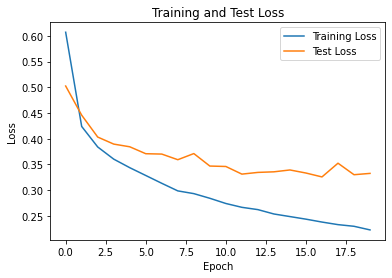

In [16]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [17]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

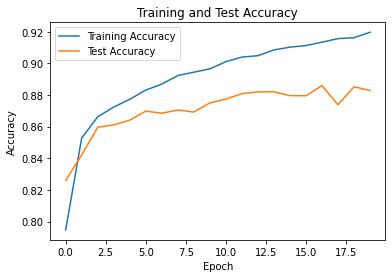

In [18]:
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [19]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

Finally, we can show a random test image with its corresponding prediction.

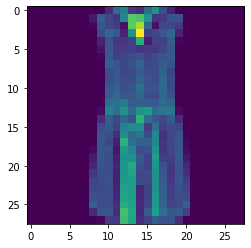

In [20]:
# Choose an index.
index = 75

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

In [21]:
print("Prediction:", class_names[np.argmax(predictions[index])])

Prediction: Dress
